<a href="https://colab.research.google.com/github/siddharth5119/Customer-churn-prediction-system/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING THE LIBRAIRES

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import  LabelEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    classification_report,
    confusion_matrix,
)
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV, cross_val_score,train_test_split,RepeatedStratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder

LOADING THE DATASET

In [3]:
df=pd.read_excel('/content/customer_churn_large_dataset.xlsx',index_col='CustomerID')

Exploratory data analysis(EDA)

In [ ]:
df.head()

,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
CustomerID,,,,,,,,
1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
2,Customer_2,62,Female,New York,1,48.76,172,0
3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
4,Customer_4,36,Female,Miami,3,97.94,297,1
5,Customer_5,46,Female,Miami,19,58.14,266,0


In [ ]:
df.tail()

,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
CustomerID,,,,,,,,
99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99997,Customer_99997,62,Female,New York,19,61.65,351,0
99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99999,Customer_99999,51,Female,New York,20,49.25,434,1
100000,Customer_100000,27,Female,Los Angeles,19,76.57,173,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 1 to 100000
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Name                        100000 non-null  object 
 1   Age                         100000 non-null  int64  
 2   Gender                      100000 non-null  object 
 3   Location                    100000 non-null  object 
 4   Subscription_Length_Months  100000 non-null  int64  
 5   Monthly_Bill                100000 non-null  float64
 6   Total_Usage_GB              100000 non-null  int64  
 7   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 6.9+ MB


In [ ]:
df.describe()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,44.027020,12.490100,65.053197,274.393650,0.497790
std,15.280283,6.926461,20.230696,130.463063,0.499998
min,18.000000,1.000000,30.000000,50.000000,0.000000
25%,31.000000,6.000000,47.540000,161.000000,0.000000
50%,44.000000,12.000000,65.010000,274.000000,0.000000
75%,57.000000,19.000000,82.640000,387.000000,1.000000
max,70.000000,24.000000,100.000000,500.000000,1.000000


In [ ]:
df.isnull().sum()

Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

NO NULL VALUES!!!

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.corr(numeric_only=True)

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
Age,1.000000,0.003382,0.001110,0.001927,0.001559
Subscription_Length_Months,0.003382,1.000000,-0.005294,-0.002203,0.002328
Monthly_Bill,0.001110,-0.005294,1.000000,0.003187,-0.000211
Total_Usage_GB,0.001927,-0.002203,0.003187,1.000000,-0.002842
Churn,0.001559,0.002328,-0.000211,-0.002842,1.000000


In [ ]:
a=df['Age'].value_counts()
a=a.sort_values()
print(a)

22    1787
34    1797
67    1798
32    1810
52    1824
45    1827
65    1833
18    1839
35    1845
47    1847
64    1848
49    1854
36    1859
68    1863
43    1863
46    1865
62    1867
37    1870
25    1871
56    1872
26    1874
30    1875
40    1875
58    1876
24    1876
28    1881
29    1885
20    1886
23    1887
39    1891
48    1895
53    1895
54    1896
21    1897
55    1900
31    1901
60    1904
61    1909
69    1912
44    1916
70    1921
66    1922
27    1924
59    1928
51    1929
42    1930
41    1939
19    1941
57    1942
63    1942
38    1970
50    1996
33    2046
Name: Age, dtype: int64


In [ ]:
df.skew(numeric_only=True)

Age                          -0.002689
Subscription_Length_Months   -0.001655
Monthly_Bill                 -0.000326
Total_Usage_GB                0.007113
Churn                         0.008840
dtype: float64

Distribution of the numerical data

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Subscription_Length_Months'}>],
       [<Axes: title={'center': 'Monthly_Bill'}>,
        <Axes: title={'center': 'Total_Usage_GB'}>]], dtype=object)

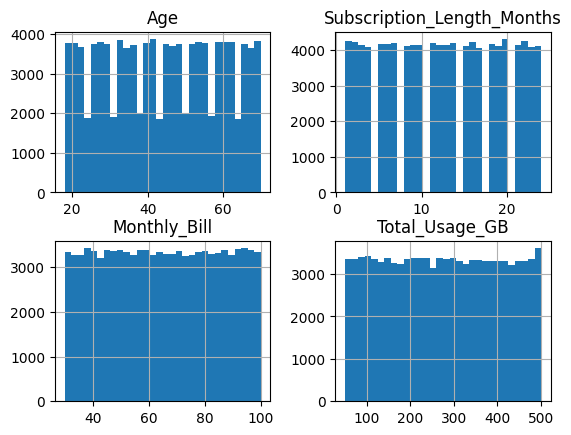

In [ ]:
cols=['Age','Subscription_Length_Months','Monthly_Bill', 'Total_Usage_GB',]
df[cols].hist(bins=30)


array([<Axes: title={'center': 'Age'}>,
       <Axes: title={'center': 'Subscription_Length_Months'}>,
       <Axes: title={'center': 'Monthly_Bill'}>,
       <Axes: title={'center': 'Total_Usage_GB'}>], dtype=object)

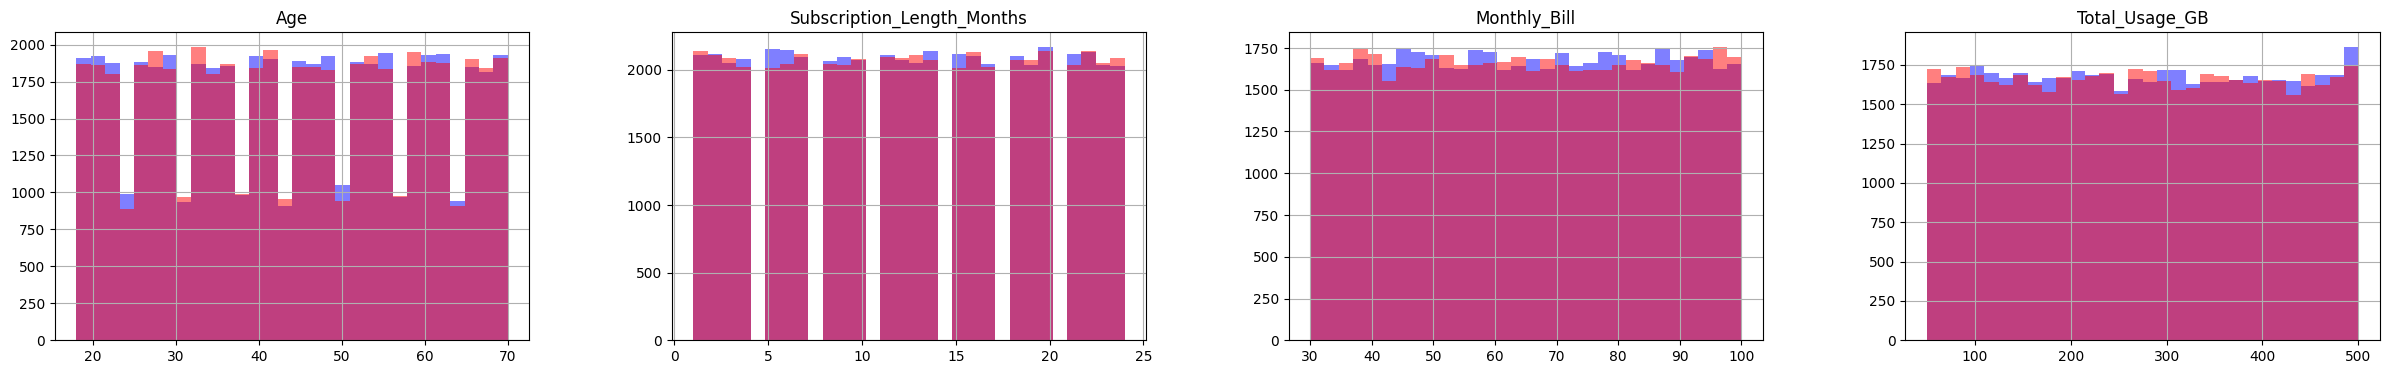

In [ ]:
fig, ax=plt.subplots(1,4, figsize=(30,4))
df[df.Churn == 0][cols].hist(bins=30, color="blue", alpha=0.5,ax=ax)
df[df.Churn == 1][cols].hist(bins=30, color="red", alpha=0.5,ax=ax)


Distribution of the categorical data

In [ ]:
a1=df.groupby(['Gender','Churn']).apply(lambda x:x['Churn'].count()).reset_index(name='Counts')
print(a1)

   Gender  Churn  Counts
0  Female      0   25272
1  Female      1   24944
2    Male      0   24949
3    Male      1   24835


In [ ]:
fig=px.bar(a1,x='Gender',y='Counts',color='Churn', text_auto=True,title='Gender counts of Customers in an Organization')
fig.update_layout(barmode='group', xaxis_tickangle=0)
fig.show()

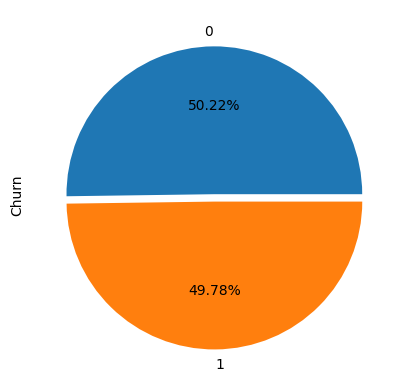

In [ ]:
(df['Churn'].value_counts()*100.0 /len(df)).plot.pie(autopct='%.2f%%' , explode = [0,0.05]);

Outliers Analysis with IQR Method

In [ ]:
x = ['Subscription_Length_Months','Monthly_Bill','Total_Usage_GB']
def count_outliers(data,col):
        q1 = data[col].quantile(0.25,interpolation='nearest')
        q2 = data[col].quantile(0.5,interpolation='nearest')
        q3 = data[col].quantile(0.75,interpolation='nearest')
        q4 = data[col].quantile(1,interpolation='nearest')
        IQR = q3 -q1
        global LLP
        global ULP
        LLP = q1 - 1.5*IQR
        ULP = q3 + 1.5*IQR
        if data[col].min() > LLP and data[col].max() < ULP:
            print("No outliers in",i)
        else:
            print("There are outliers in",i)
            x = data[data[col]<LLP][col].size
            y = data[data[col]>ULP][col].size
            a.append(i)
            print('Count of outliers are:',x+y)
global a
a = []
for i in x:
    count_outliers(df,i)

No outliers in Subscription_Length_Months
No outliers in Monthly_Bill
No outliers in Total_Usage_GB


{'whiskers': [<matplotlib.lines.Line2D at 0x78450d791450>,
 'caps': [<matplotlib.lines.Line2D at 0x78450d791810>,
 'boxes': [<matplotlib.lines.Line2D at 0x78450d7911b0>],
 'medians': [<matplotlib.lines.Line2D at 0x78450d791d50>],
 'fliers': [<matplotlib.lines.Line2D at 0x78450d791ff0>],
 'means': []}

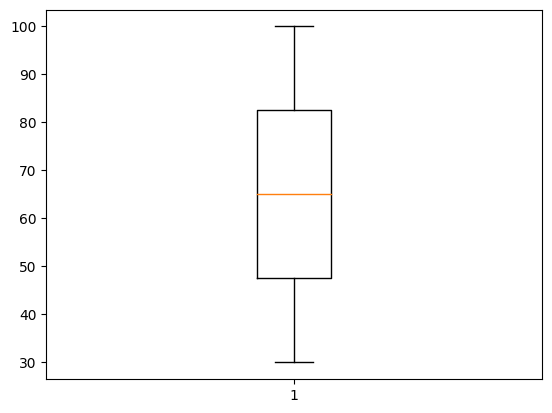

In [ ]:
plt.boxplot(df[['Monthly_Bill']])

We have deleted the names columns as it was meaning less

In [4]:
df.drop(['Name'],axis = 1,inplace = True)

In [ ]:
df.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
CustomerID,,,,,,,
1,63,Male,Los Angeles,17,73.36,236,0
2,62,Female,New York,1,48.76,172,0
3,24,Female,Los Angeles,5,85.47,460,0
4,36,Female,Miami,3,97.94,297,1
5,46,Female,Miami,19,58.14,266,0


In [ ]:
df.columns

Index(['Age', 'Gender', 'Location', 'Subscription_Length_Months',
       'Monthly_Bill', 'Total_Usage_GB', 'Churn'],
      dtype='object')

On Hot Encoding:for transforming categorical data to numeric

In [5]:
df1=pd.get_dummies(data=df,columns=['Gender','Location'],drop_first=True)

In [6]:
df1.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
CustomerID,,,,,,,,,,
1,63,17,73.36,236,0,1,0,1,0,0
2,62,1,48.76,172,0,0,0,0,0,1
3,24,5,85.47,460,0,0,0,1,0,0
4,36,3,97.94,297,1,0,0,0,1,0
5,46,19,58.14,266,0,0,0,0,1,0


In [7]:
df1.columns

Index(['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn', 'Gender_Male', 'Location_Houston', 'Location_Los Angeles',
       'Location_Miami', 'Location_New York'],
      dtype='object')

In [8]:
df1=df1[['Age','Gender_Male', 'Location_Houston', 'Location_Los Angeles','Location_Miami', 'Location_New York','Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB','Churn']]

In [9]:
df1.head()

,Age,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
CustomerID,,,,,,,,,,
1,63,1,0,1,0,0,17,73.36,236,0
2,62,0,0,0,0,1,1,48.76,172,0
3,24,0,0,1,0,0,5,85.47,460,0
4,36,0,0,0,1,0,3,97.94,297,1
5,46,0,0,0,1,0,19,58.14,266,0


In [ ]:
correlation = df1.corr()

<Axes: >

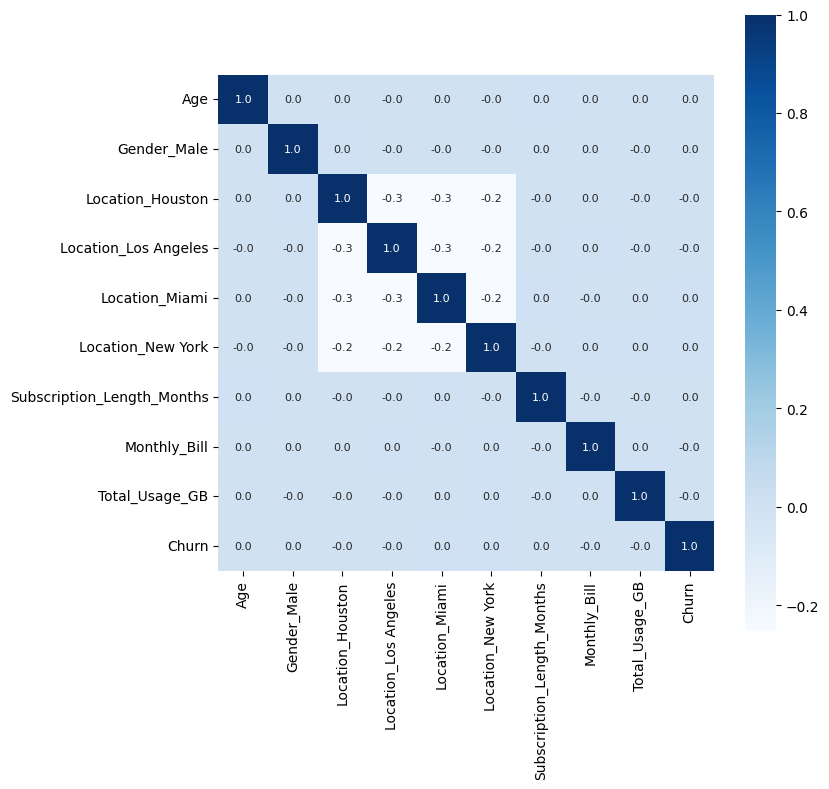

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Blues')

FEATURE SCALING USING Standard scaler

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols=['Age','Subscription_Length_Months','Monthly_Bill', 'Total_Usage_GB', 'Churn']
# To scale data
d=scaler.fit(df1[cols])

pickle.dump(scaler, open('scaler.pickle','wb'))


Feature selection

In [10]:
X = df1.drop('Churn',axis='columns')
y = df1['Churn']
print('Shape of X:',X.shape)
print('Shape of y:',y.shape)

Shape of X: (100000, 9)
Shape of y: (100000,)


Spliting of Dataset in Train and Test

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)
print('Shape of X_train:',X_train.shape)
print('Shape of X_test:',X_test.shape)
print('Shape of y_train:',y_train.shape)
print('Shape of y_test:',y_test.shape)

Shape of X_train: (80000, 9)
Shape of X_test: (20000, 9)
Shape of y_train: (80000,)
Shape of y_test: (20000,)


Prediction using Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score ,confusion_matrix

lr = LogisticRegression(C=100,penalty='l2')
lr.fit(X_train,y_train)

LogisticRegression(C=100)

In [ ]:
predLR = lr.predict(X_test)
predLR

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print(classification_report(y_test, predLR))

              precision    recall  f1-score   support

           0       0.50      0.70      0.58      9950
           1       0.50      0.30      0.38     10050

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.48     20000
weighted avg       0.50      0.50      0.48     20000



In [ ]:
accuracy_score(y_test, predLR)

0.49785

In [ ]:
confusion_matrix_LR = confusion_matrix(y_test, predLR)

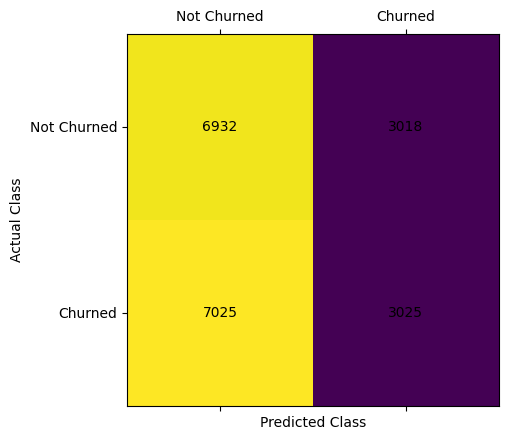

In [ ]:
# create a heatmap of the matrix using matshow()

plt.matshow(confusion_matrix(y_test, predLR))

# add labels for the x and y axes
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

for i in range(2):
    for j in range(2):
        plt.text(j, i, confusion_matrix_LR[i, j], ha='center', va='center')


# Add custom labels for x and y ticks
plt.xticks([0, 1], ["Not Churned", "Churned"])
plt.yticks([0, 1], ["Not Churned", "Churned"])
plt.show()

Prediction using Decision Tree Classifier

In [ ]:
df1

,Age,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
CustomerID,,,,,,,,,,
1,63,1,0,1,0,0,17,73.36,236,0
2,62,0,0,0,0,1,1,48.76,172,0
3,24,0,0,1,0,0,5,85.47,460,0
4,36,0,0,0,1,0,3,97.94,297,1
5,46,0,0,0,1,0,19,58.14,266,0
...,...,...,...,...,...,...,...,...,...,...
99996,33,1,1,0,0,0,23,55.13,226,1
99997,62,0,0,0,0,1,19,61.65,351,0
99998,64,1,0,0,0,0,17,96.11,251,1


In [14]:
from sklearn.preprocessing import StandardScaler
scaler_dtc = StandardScaler()
# To scale data
d=scaler_dtc.fit(df1.values)

pickle.dump(scaler_dtc, open('scaler_dtc.pickle','wb'))

In [15]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

dtc.fit(X_train, y_train)

pickle.dump(dtc, open('dtc.pickle','wb'))
y_pred_dtc = dtc.predict(X_test)


In [16]:
print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.50      0.51      0.50      9950
           1       0.50      0.50      0.50     10050

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



In [ ]:
accuracy_score(y_test, y_pred_dtc)

0.50195

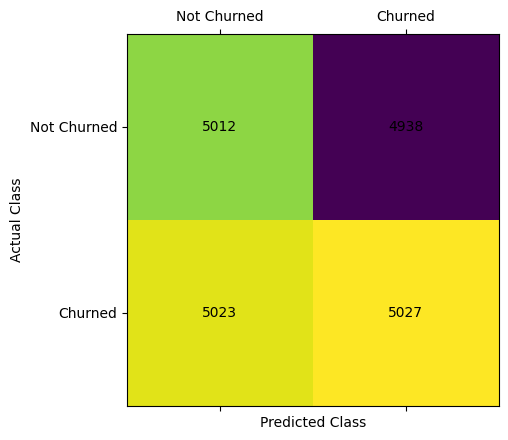

In [ ]:
confusion_matrix_dtc = confusion_matrix(y_test, y_pred_dtc)
# create a heatmap of the matrix using matshow()

plt.matshow(confusion_matrix_dtc)

# add labels for the x and y axes
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

for i in range(2):
    for j in range(2):
        plt.text(j, i, confusion_matrix_dtc[i, j], ha='center', va='center')


# Add custom labels for x and y ticks
plt.xticks([0, 1], ["Not Churned", "Churned"])
plt.yticks([0, 1], ["Not Churned", "Churned"])
plt.show()

Prediction using Random Forest Classifier

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.49605


In [ ]:
len(X_train.columns)

9

Prediction using Artificial Neural Network

In [ ]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(9, input_shape=(9,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

In [ ]:
yp = model.predict(X_test)

625/625 [==============================] - 1s 1ms/step


In [ ]:
yp[:5]

array([[0.4953655],
       [0.4953655],
       [0.4953655],
       [0.4953655],
       [0.4953655]], dtype=float32)

In [ ]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [ ]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
y_test[:10]

CustomerID
60744    1
33950    1
52806    1
11805    1
9230     1
49951    1
24989    0
90272    0
33533    0
88300    0
Name: Churn, dtype: int64

Text(95.72222222222221, 0.5, 'Truth')

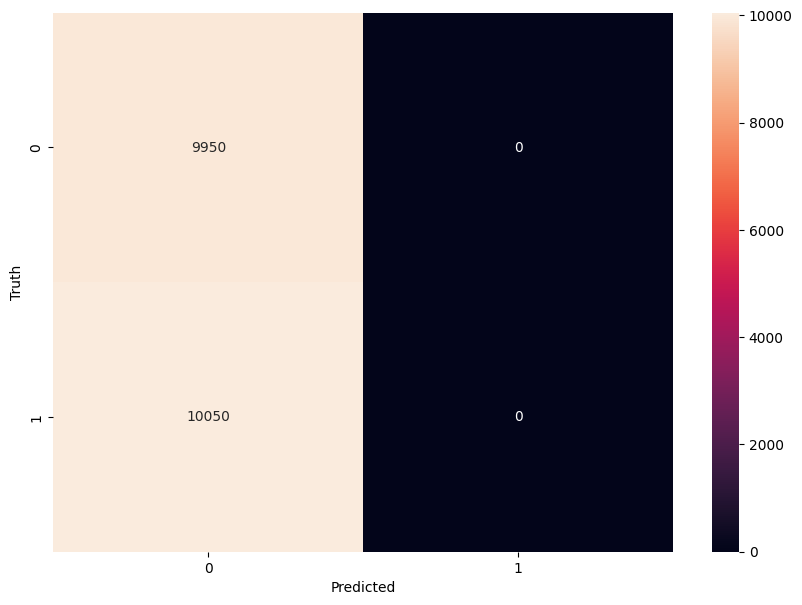

In [ ]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
accuracy_score(y_test, y_pred)

0.4975

Prediction using Support Vector Machine

In [ ]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)


SVC()

In [ ]:
svcy_pred=clf.predict(X_test)

In [ ]:
accuracy_score(y_test,svcy_pred)

0.49605

As we can see decision tree is giving high accuracy among others

In [17]:
dtc.tree_.max_depth

58

In [19]:
from sklearn.metrics import classification_report,accuracy_score ,confusion_matrix

dtc = DecisionTreeClassifier(max_depth=18)

dtc.fit(X_train.values, y_train.values)

pickle.dump(dtc, open('dtc.pickle','wb'))
y_pred_dtc = dtc.predict(X_test.values)

print(accuracy_score(y_test,y_pred_dtc))

0.50555


In [ ]:
for max_d in range(1,50):
  model = DecisionTreeClassifier(max_depth=max_d, random_state=42)
  model.fit(X_train,y_train)
  y_pred_ldtc=model.predict(X_test)
  print('The Training Accuracy for max_depth {} is:'.format(max_d), accuracy_score(y_test,y_pred_ldtc))
  print('')

The Training Accuracy for max_depth 1 is: 0.49695

The Training Accuracy for max_depth 2 is: 0.49695

The Training Accuracy for max_depth 3 is: 0.49595

The Training Accuracy for max_depth 4 is: 0.4987

The Training Accuracy for max_depth 5 is: 0.50195

The Training Accuracy for max_depth 6 is: 0.50095

The Training Accuracy for max_depth 7 is: 0.5008

The Training Accuracy for max_depth 8 is: 0.4992

The Training Accuracy for max_depth 9 is: 0.50305

The Training Accuracy for max_depth 10 is: 0.4993

The Training Accuracy for max_depth 11 is: 0.4958

The Training Accuracy for max_depth 12 is: 0.49355

The Training Accuracy for max_depth 13 is: 0.4985

The Training Accuracy for max_depth 14 is: 0.49835

The Training Accuracy for max_depth 15 is: 0.5025

The Training Accuracy for max_depth 16 is: 0.50085

The Training Accuracy for max_depth 17 is: 0.50375

The Training Accuracy for max_depth 18 is: 0.50525

The Training Accuracy for max_depth 19 is: 0.50185

The Training Accuracy for ma

so our max depth of decision tree will be 18

Model performance metrics and visualizations.

In [20]:
# Function to calculate Precision and Recall

def calc_precision_recall(y_true, y_pred):

    # Convert predictions to series with index matching y_true
    y_pred = pd.Series(y_pred, index=y_true.index)

    # Instantiate counters
    TP = 0
    FP = 0
    FN = 0

    # Determine whether each prediction is TP, FP, TN, or FN
    for i in y_true.index:
        if y_true[i]==y_pred[i]==1:
           TP += 1
        if y_pred[i]==1 and y_true[i]!=y_pred[i]:
           FP += 1
        if y_pred[i]==0 and y_test[i]!=y_pred[i]:
           FN += 1

    # Calculate true positive rate and false positive rate
    # Use try-except statements to avoid problem of dividing by 0
    try:
        precision = TP / (TP + FP)
    except:
        precision = 1

    try:
        recall = TP / (TP + FN)
    except:
        recall = 1

    return precision, recall

# Test function

calc_precision_recall(y_test, y_pred_dtc)

(0.5090540996513329, 0.45034825870646766)

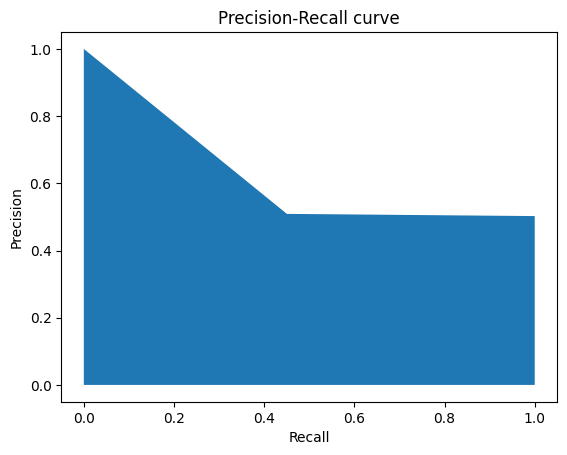

In [22]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_dtc)
plt.fill_between(recall, precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Precision-Recall curve");

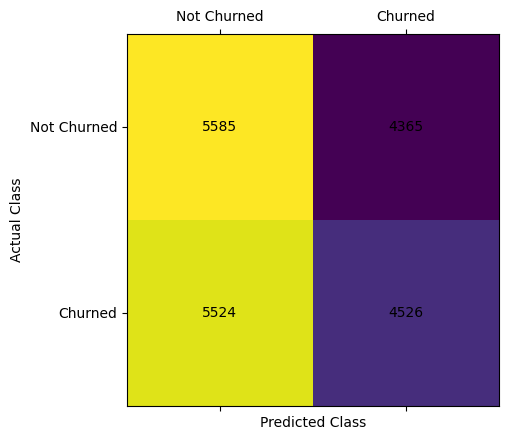

In [23]:
confusion_matrix_dtc = confusion_matrix(y_test, y_pred_dtc)
# create a heatmap of the matrix using matshow()

plt.matshow(confusion_matrix_dtc)

# add labels for the x and y axes
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

for i in range(2):
    for j in range(2):
        plt.text(j, i, confusion_matrix_dtc[i, j], ha='center', va='center')


# Add custom labels for x and y ticks
plt.xticks([0, 1], ["Not Churned", "Churned"])
plt.yticks([0, 1], ["Not Churned", "Churned"])
plt.show()

Building a Predictive System

In [ ]:
X_test.head()

,Age,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
CustomerID,,,,,,,,,
60744,27,1,1,0,0,0,2,59.82,364
33950,35,1,0,0,0,0,21,47.35,422
52806,63,0,0,1,0,0,6,95.91,390
11805,65,1,0,1,0,0,16,34.63,59
9230,45,0,0,0,0,0,22,93.33,408


In [ ]:
y_test.head()

CustomerID
60744    1
33950    1
52806    1
11805    1
9230     1
Name: Churn, dtype: int64

In [ ]:
print(X_train.shape)
print(X_test.shape)

(80000, 9)
(20000, 9)


Model deployment using pickle

In [13]:
import pickle
import numpy as np

lc=pickle.load(open('/content/dtc.pickle','rb'))
ls=pickle.load(open('/content/scaler_dtc.pickle','rb'))

new_pred=lc.predict(np.array([[27,1,1,0,0,0,2,59.82,364]]))
new_pred


FileNotFoundError: ignored